# Show clustering result after feature extraction

Clustering Algorithm: KMEANS, a clustering algorithm with 1 parameters: number of clusters

### Optional: Principal component analysis (PCA)

PCA: After feature extraction, each input image is represented using 2048 dimensions. Many researchers propose the reduce the number of dimensions before clustering

## <font color=red>User Input required</font>


In [209]:
outname= "fine_tune_batchsize5_epoch150_Rotated"
feature_path = "/work-ceph/lprasse/siegel/features/"

## Python packages used

In [210]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pickle5 as pickle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
from sklearn.decomposition import PCA
import os

## Functions defined

In [211]:
def save_as_pickle(obj, filename):
    """
    save an object in a pickle file dump
    :param obj: object to dump
    :param filename: target file
    :return:
    """
    directory = os.path.dirname(filename)
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    with open(filename, 'wb') as file:
        pickle.dump(obj, file, protocol=pickle.HIGHEST_PROTOCOL)

def load_pickle(filename):
    """
    load an object from a given pickle file
    :param filename: source file
    :return: loaded object
    """
    with open(filename, 'rb') as file:
        return pickle.load(file)

## Load extracted features and filenames

In [212]:
for i in range(37):
    features = np.array(load_pickle(os.path.join(feature_path, outname, f"train_{i}.pkl")).cpu())
    if i == 0:
        X = features
    else:
        X = np.append(X,features, axis=0)

#X = StandardScaler().fit_transform(X)
print(X.shape)

#"fine_tune_batchsize5_epoch200_Rotated" - eps = 0.027, min_samples=10

(7345, 2048)


In [213]:
filenames = load_pickle(os.path.join(feature_path, outname, "filenames.pkl"))
print(len(filenames))

7345


## Optional: PCA

In [214]:
pca = PCA(n_components=250) # set according to guttman kaiser criterion
X = pca.fit_transform(X)

# Use the indicators to select n_components
#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)

## Compute KMEANS clusters and print statistics

In [227]:
# Compute KMEANS
kmeans = KMeans(n_clusters=15, random_state=0).fit(X)
labels = kmeans.labels_

#kmeans.cluster_centers_

In [228]:
cluster = zip(labels, filenames)

results = {}

for (label, filename) in cluster:
    if label in results:
        results[label].append(filename)
    else:
        results[label]=[filename]

for i in range(len(results)):
    print(f"Cluster {i} contains {len(results[i])} datapoints.")

# Clusters 0-x contain the found clusters

Cluster 0 contains 265 datapoints.
Cluster 1 contains 4435 datapoints.
Cluster 2 contains 171 datapoints.
Cluster 3 contains 47 datapoints.
Cluster 4 contains 287 datapoints.
Cluster 5 contains 123 datapoints.
Cluster 6 contains 113 datapoints.
Cluster 7 contains 263 datapoints.
Cluster 8 contains 374 datapoints.
Cluster 9 contains 350 datapoints.
Cluster 10 contains 428 datapoints.
Cluster 11 contains 15 datapoints.
Cluster 12 contains 197 datapoints.
Cluster 13 contains 143 datapoints.
Cluster 14 contains 134 datapoints.


## Show several images for each cluster

### Clusters 0 - x

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.502.0.17.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.503.0.11.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.503.0.13.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.503.0.21.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.505.0.24.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.513.0.11.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.513.0.17.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.513.1.06.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.513.1.09.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.514.0.06.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.519.0.04.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.521.1

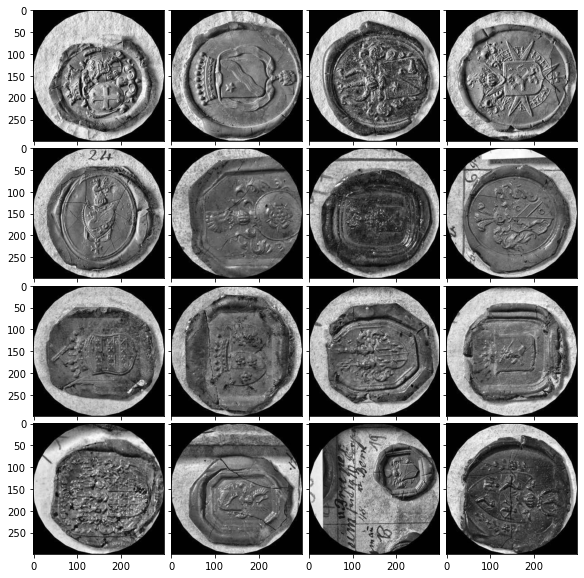

In [229]:
cluster_1 = results[0]

print_cluster1 = cluster_1[100:116]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1089.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1090.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1091.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1097.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.11..jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1100.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1101.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1103.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1104.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1107.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1112.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1117.jpg
/work-ceph/lprasse/siegel/data/siegel_gra

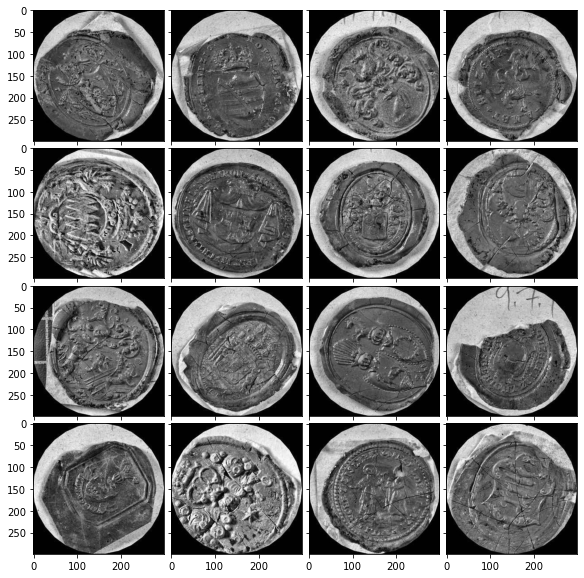

In [232]:
cluster_1 = results[1]

print_cluster1 = cluster_1[20:36]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.110.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1110.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1135.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1170.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.125.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1270.0.01.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1270.0.02.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1293.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1295.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1297.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1298.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1302.jpg
/work-ceph/lprasse/siegel/data/s

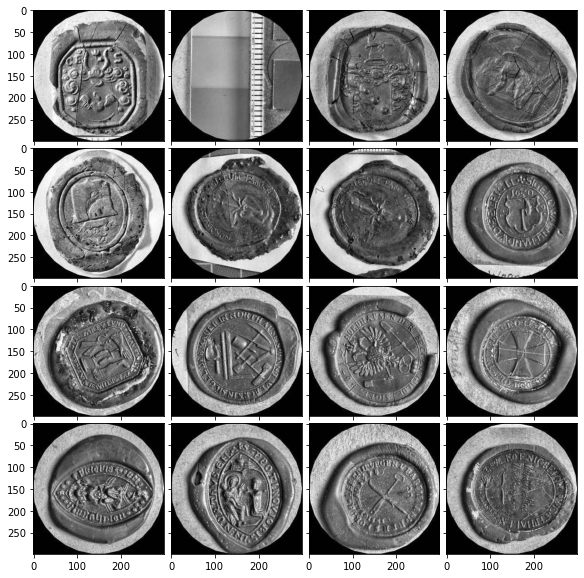

In [233]:
cluster_1 = results[2]

print_cluster1 = cluster_1[0:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1275.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1285.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1311.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1336.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1345.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1361.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1362.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.150.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.224.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.241.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.456.0.01.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.456.0.05.jpg
/work-ceph/lprasse/siegel/data/sieg

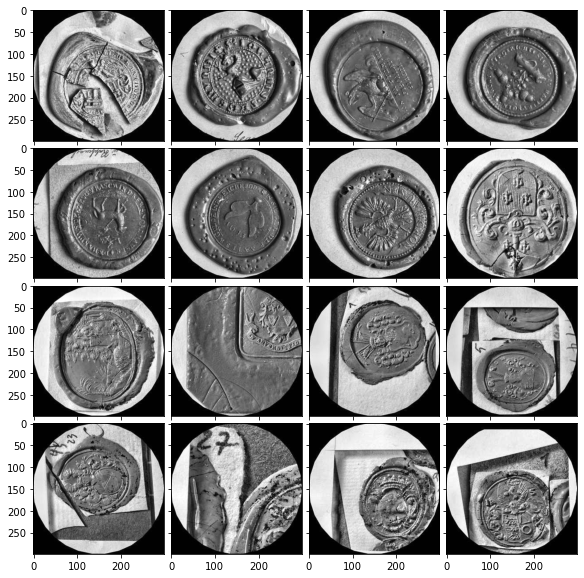

In [234]:
cluster_1 = results[3]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.31..jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.321.0.1.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.332.0.01.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.333.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.361.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.362.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.365.02.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.374.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.379.02.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.382.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.442.0.17.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.444.0.12.jpg
/work-ceph/lprasse/siegel/d

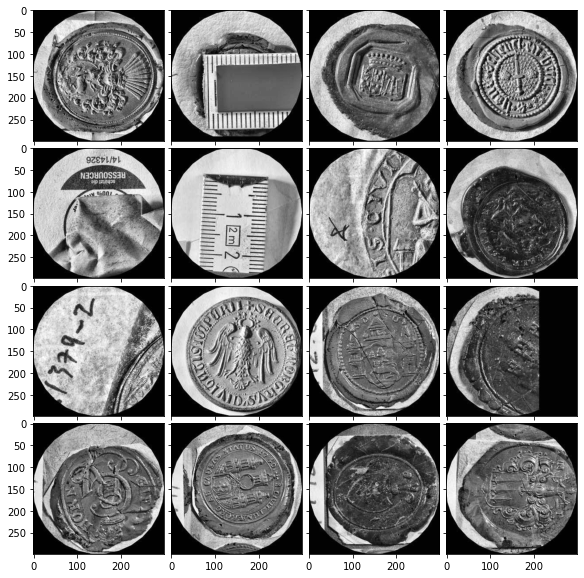

In [235]:
cluster_1 = results[4]

print_cluster1 = cluster_1[30:46]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1277.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.130.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1328.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1334.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.155.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.184.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.293.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.323.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.384.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.444.0.36.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.446-2.0.21.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.447.0.07.jpg
/work-ceph/lprasse/siegel/data/s

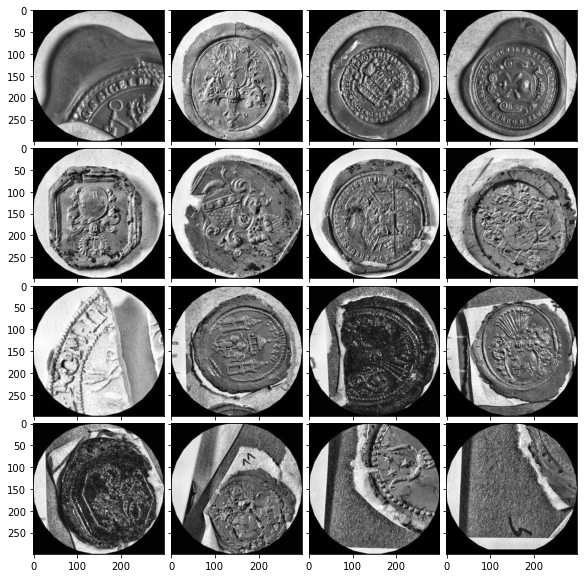

In [236]:
cluster_1 = results[5]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1095.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1211.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1246.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1282.b.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1288.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1292.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1303.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1306.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1315.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1337.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1341.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1342.jpg
/work-ceph/lprasse/siegel/data/siegel_

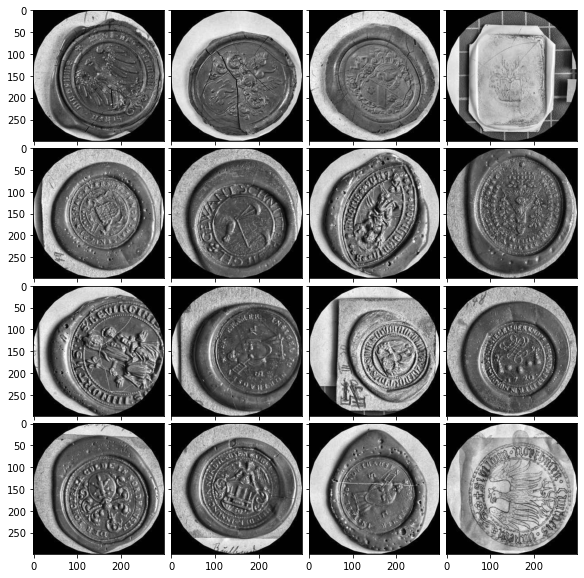

In [237]:
cluster_1 = results[6]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.15.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1111.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1115.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1129.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1156.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1207.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1228.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1232.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1233.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1240.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1250.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1252.jpg
/work-ceph/lprasse/siegel/data/siegel_gr

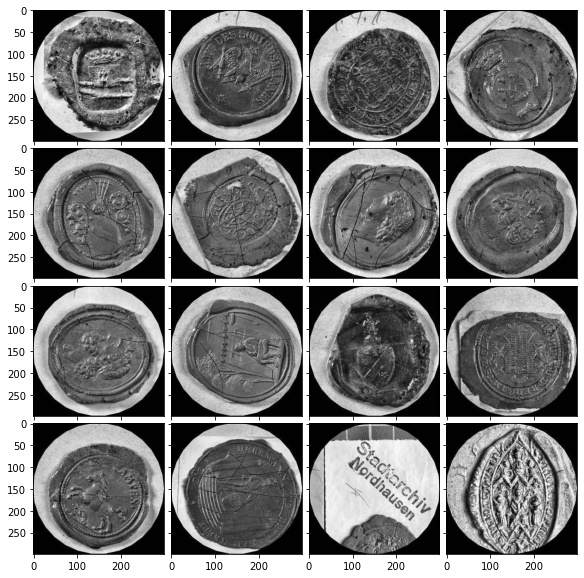

In [238]:
cluster_1 = results[7]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1087.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1092.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1094.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1109.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1114.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1186.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1198.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1204.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1227.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1249.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.21..jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.281.jpg
/work-ceph/lprasse/siegel/data/siegel_gray

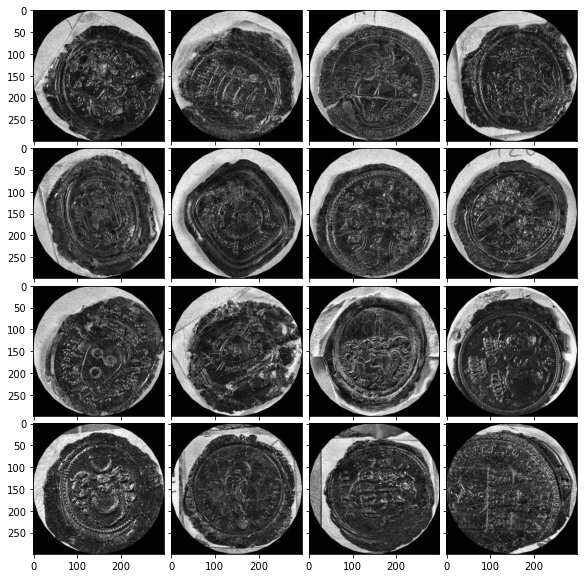

In [239]:
cluster_1 = results[8]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

In [ ]:
cluster_1 = results[9]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

In [ ]:
cluster_1 = results[10]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.07.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1211.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.123.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.136.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1375.11.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1375.16.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.446-1.0.28.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.455.0.04.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.457.0.05.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.457.0.15.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.457.0.27.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.462.0.08.jpg
/work-ceph

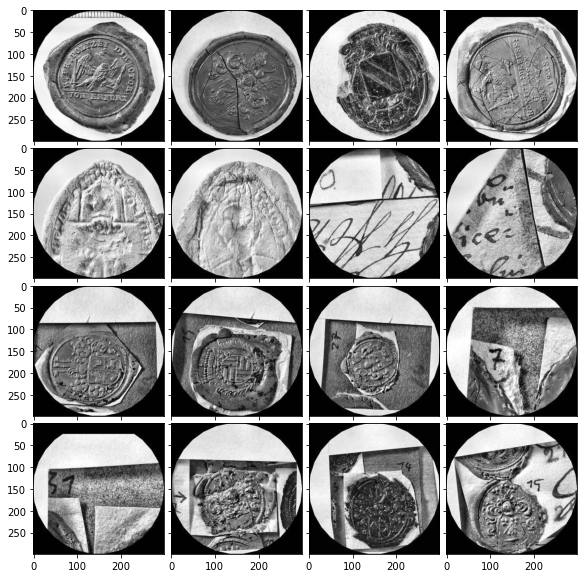

In [113]:
cluster_1 = results[11]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1088.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1125.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1141.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1143.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1144.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1154.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1170.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1189.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1208.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1216.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1222.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1237.jpg
/work-ceph/lprasse/siegel/data/siegel_gr

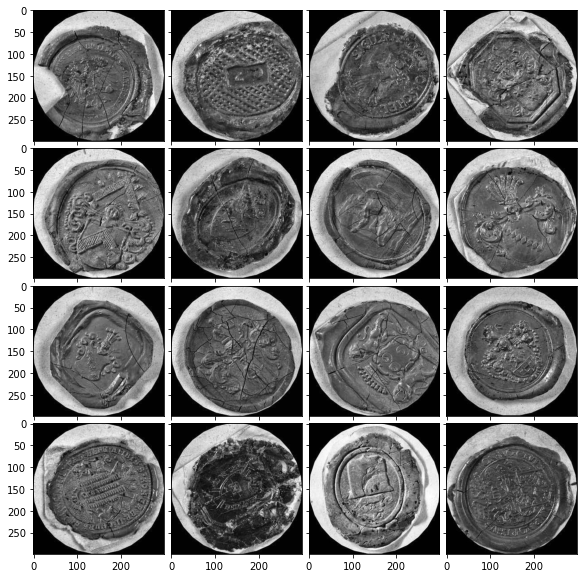

In [114]:
cluster_1 = results[12]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1.16.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.109.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1100.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1110.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1117.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1129.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1171.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1187.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1192.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1206.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1210.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1226.jpg
/work-ceph/lprasse/siegel/data/siegel_gra

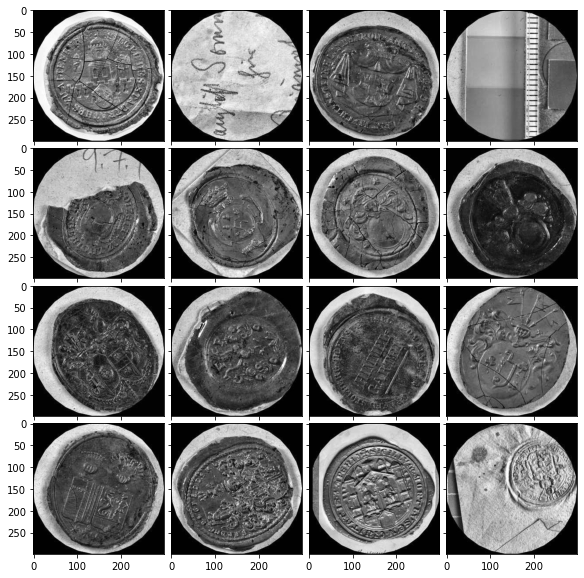

In [115]:
cluster_1 = results[13]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.10..jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.108.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1081.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1085.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1093.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.110.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1104.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1121.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1123.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1133.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1159.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_norm/samples/StadtA_NDH_9.7.1160.jpg
/work-ceph/lprasse/siegel/data/siegel_gray_

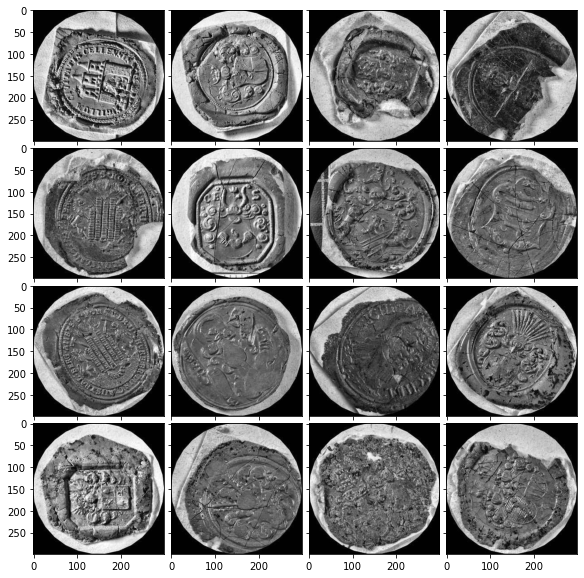

In [116]:
cluster_1 = results[14]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

In [97]:
cluster_1 = results[15]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

KeyError: 15

In [ ]:
cluster_1 = results[16]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()

In [ ]:
cluster_1 = results[17]

print_cluster1 = cluster_1[:16]
img2print=[]

for file in print_cluster1:
    print(file)
    img = Image.open(file)
    img2print.append(img)

fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img2print):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap="gray")

plt.show()